## Hyperparameter tuning with RandomizedSearchCV

RandomizedSearchCV implements fit and score method, also implements predict and predict_proba, decision_function

In [1]:
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Read in the data
heart_disease = pd.read_csv("heart-disease.csv")

# Split into X (features) & y (labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
grid= {"n_estimators" :[10,100,200,500,1000,1200],
       "max_depth" :[None, 5,10,20,30],
       "max_features":["auto", "sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}
import numpy as np
np.random.seed(42)

#split inot x and y
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#setup randomized searchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,  #no of models to try  n_iter-no of iteration
                          cv=5,    #5 fold cross validaton cv-cross validation
                          verbose=2)


#fit the randomizedsearchcv version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [24]:
np.random.seed(42)

#create a second classifier with diff parameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

y_preds_2=clf_2.predict(X_valid)

clf_2_metrics=evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.80
Recall: 0.83
F1 score: 0.82


In [7]:
## whcih combination of these got best result

rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [12]:
# Makiing predictions with best hyperparameters

rs_y_preds=rs_clf.predict(x_test)

#evaluating
rs_metrics=evaluate_preds(y_test, rs_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


## Hyperparameters using gridearchcv`

In [13]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [17]:
grid_2={'n_estimators': [100, 200, 500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_split': [6],
     'min_samples_leaf': [1, 2]}

In [18]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
np.random.seed(42)

#split inot x and y
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#setup randomized searchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,    #5 fold cross validaton cv-cross validation
                          verbose=2)


#fit the gridsearchcv version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\sample_project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [19]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [20]:
gs_y_preds=gs_clf.predict(x_test)

#evaluate the prodctions
gs_metrics=evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


## let's compare diff model metrics

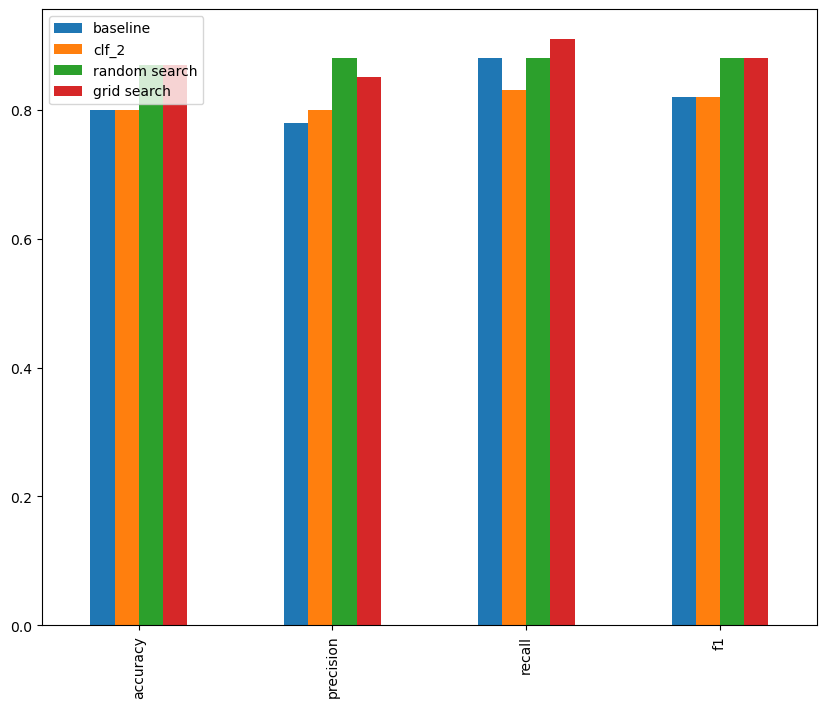

In [25]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search":rs_metrics,
                              "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));